In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Load up the analysis of the different simulations
df = pd.read_hdf('summary.h5')

In [3]:
csfont = {'fontname':'Times New Roman'}

In [4]:
# Ugh, I was dumb. Let's try to sort by satellite basis function weight

weight = [float(rn.replace('satellite_sim_', '').split('_')[0]) for rn in df.index]

In [5]:
order = np.argsort(weight)
df = df.iloc[order]

In [6]:
df

metric,Length of Survey (days),"NChanges filter, observationStartMJD",OpenShutterFraction,tEff,Number of Exposures,Sum SkySaturation,Slew Count All visits,Mean slewTime All visits,Median slewTime All visits,Min slewTime All visits,...,3x2ptFoM ExgalM5_with_cuts i band non-DD year 9 HealpixSlicer,3x2ptFoM_simple ExgalM5_with_cuts i band non-DD year 9 HealpixSlicer,Mean ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Median ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Rms ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,3x2ptFoM_simple ExgalM5_with_cuts i band non-DD year 4 HealpixSlicer,Median SurfaceBrightLimit i HealpixSlicer,Sum NgalScale i HealpixSlicer
run_name,,,,,,,,,,,,,,,,,,,,,
satellite_sim_0.0_onew_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.0_slv1_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.0_slv2_v2.2_1yrs,364.998172,3374.0,0.716841,0.720839,214014.0,0.0,214014.0,7.902378,4.890227,2.0,...,-1.637500e+30,-1.637500e+30,25.445092,25.435515,0.036600,876.222566,24.122786,-666.0,28.565033,1.409425e+07
satellite_sim_0.1_onew_v2.2_1yrs,364.998009,3384.0,0.716808,0.719362,214035.0,0.0,214035.0,7.897877,4.891482,2.0,...,-1.637500e+30,-1.637500e+30,25.454056,25.443157,0.044831,815.793423,24.145443,-666.0,28.573982,1.397698e+07
satellite_sim_0.1_slv1_v2.2_1yrs,364.998198,3390.0,0.716865,0.719733,214086.0,0.0,214086.0,7.898024,4.890839,2.0,...,-1.637500e+30,-1.637500e+30,25.455705,25.447249,0.042689,1170.814635,24.090104,-666.0,28.575860,1.413346e+07
satellite_sim_0.1_slv2_v2.2_1yrs,364.998095,3399.0,0.717148,0.717716,214146.0,0.0,214146.0,7.880273,4.888636,2.0,...,-1.637500e+30,-1.637500e+30,25.444550,25.434624,0.037525,703.328075,24.150973,-666.0,28.570983,1.399130e+07
satellite_sim_1.0_slv1_v2.2_1yrs,364.997929,3352.0,0.717218,0.720190,214203.0,0.0,214203.0,7.878771,4.895048,2.0,...,-1.637500e+30,-1.637500e+30,25.448768,25.440391,0.038652,828.382828,24.138899,-666.0,28.574194,1.405381e+07
satellite_sim_1.0_slv2_v2.2_1yrs,364.998075,3362.0,0.716855,0.723456,214041.0,0.0,214041.0,7.897200,4.897824,2.0,...,-1.637500e+30,-1.637500e+30,25.453393,25.443134,0.043276,769.632273,24.153099,-666.0,28.578708,1.433445e+07
satellite_sim_1.0_onew_v2.2_1yrs,364.997813,3348.0,0.716274,0.719743,213896.0,0.0,213896.0,7.931131,4.894397,2.0,...,-1.637500e+30,-1.637500e+30,25.454198,25.445268,0.043549,1028.134715,24.112333,-666.0,28.576064,1.388939e+07


In [7]:
# Now let's add some more columns based on the results we saved

save_dir = './'

dodge_weights = []
const_name = []
streak_length_sums = []
n_streak_sums = []
n_streaked_images = []
for sim_name in df.index:
    dodge_weights.append(float(sim_name.split('_')[2]))
    const_name.append(sim_name.split('_')[3])
    _temp = np.load(save_dir+sim_name+'.npz')['obs_array'].copy()
    
    streak_length_sums.append(np.sum(_temp['streak_len_deg']))
    n_streak_sums.append(np.sum(_temp['n_streaks']))
    n_streaked_images.append(np.size(np.where(_temp['n_streaks'] > 0)[0]))
    
    
df['dodge_weights'] = dodge_weights
df['constellation_name'] = const_name
df['streak_length_sum'] = streak_length_sums
df['n_streaks'] = n_streak_sums
df['n_streaked_images'] = n_streaked_images


Text(0, 0.5, 'N Visits')

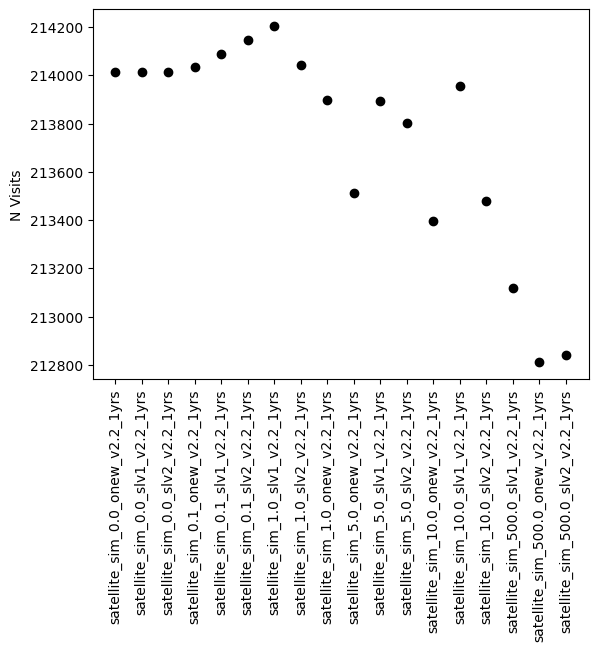

In [8]:

    
fig, ax = plt.subplots()

ax.plot(df['Number of Exposures'], 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N Visits')

Text(0, 0.5, 'Streak Length (degrees)')

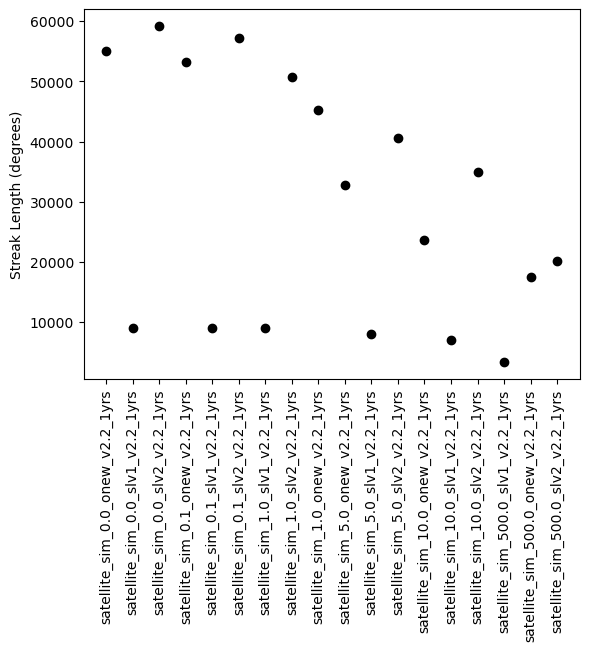

In [15]:
fig, ax = plt.subplots()

ax.plot(df['streak_length_sum'], 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Streak Length (degrees)')

Text(0, 0.5, 'Mean Streak Length per Visit (arcmin)')

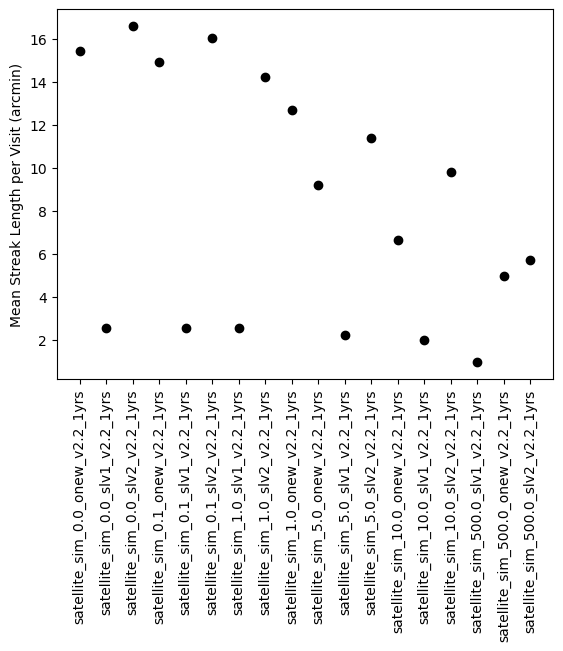

In [16]:
# Let's figure out the average streak length per image

fig, ax = plt.subplots()

ax.plot(df['streak_length_sum']/df['Number of Exposures']*60, 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Mean Streak Length per Visit (arcmin)')


In [10]:
# XXX--need to plug in what we think a typical streak width is, compute the number of pixels we lose
# Then plot the mean fraction of pixels lost 

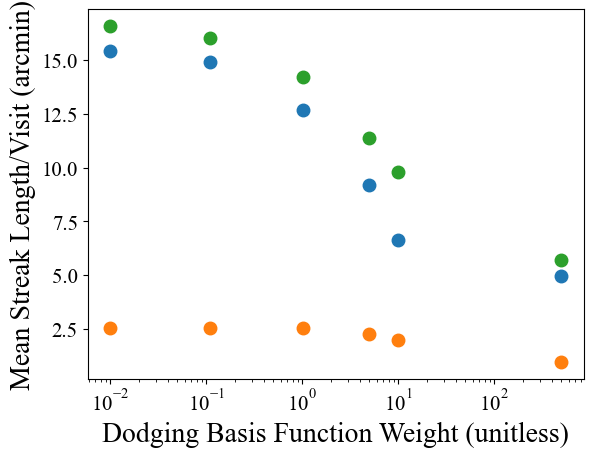

In [74]:
# Let's make some nicer plots
fig, ax = plt.subplots()

mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*60  # in arcmin

for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    ax.semilogx(df['dodge_weights'].values[good]+1e-2, mean_streak_length.values[good], 'o', label=c_name, markersize=9)
    # There's probably a better way to do this with pandas .loc or .iloc, but I refuse to learn it
    # when I can get away with simple np.where

# legend = ax.legend(fontsize=16)
# plt.setp(legend.texts, family='Times New Roman')
# ax.set_xticklabels(fontsize=10)
ax.set_ylabel('Mean Streak Length/Visit (arcmin)',fontsize=20,labelpad=4, **csfont)
ax.set_xlabel('Dodging Basis Function Weight (unitless)',fontsize=20,labelpad=4, **csfont)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(**csfont)
plt.yticks(**csfont)
plt.savefig('streaklen_v_weight.pdf',bbox_inches="tight")

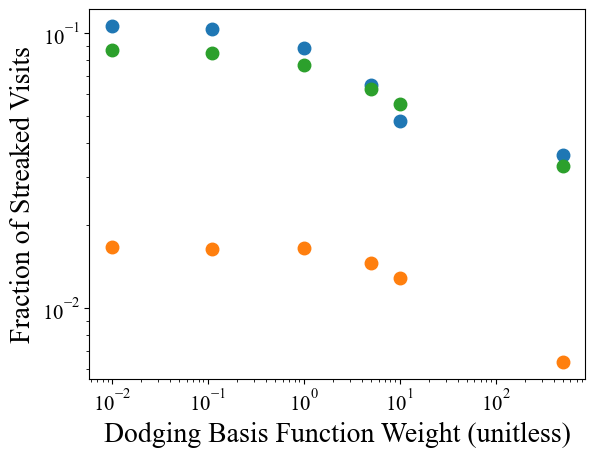

In [75]:
fig, ax = plt.subplots()

mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*60  # in arcmin

for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    
    ax.loglog(df['dodge_weights'].values[good]+1e-2,
            df['n_streaked_images'].values[good]/df['Number of Exposures'].values[good], 'o', label=c_name,markersize=9)
    
    #ax.semilogx(df['dodge_weights'].values[good]+1e-2, mean_streak_length.values[good], 'o', label=c_name)
    # There's probably a better way to do this with pandas .loc or .iloc, but I refuse to learn it
    # when I can get away with simple np.where

# legend = ax.legend(loc='upper right',fontsize=16)
# plt.setp(legend.texts, family='Times New Roman')
ax.set_ylabel('Fraction of Streaked Visits',fontsize=20,labelpad=4, **csfont)
ax.set_xlabel('Dodging Basis Function Weight (unitless)',fontsize=20,labelpad=4, **csfont)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(**csfont)
plt.yticks(**csfont)
plt.savefig('streakfrac_v_weight.pdf',bbox_inches="tight")

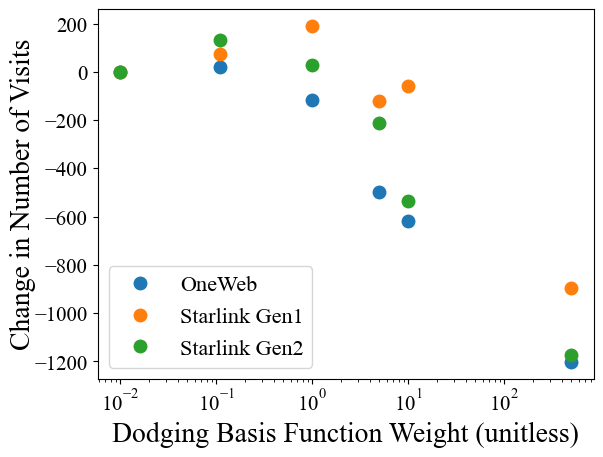

In [10]:
fig, ax = plt.subplots()

mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*60  # in arcmin

for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)
    # putting in a fudge factor of 1e-2 so a log-scale axis works well
    if c_name == 'onew': 
        label_name='OneWeb'
    elif c_name == 'slv1':
        label_name='Starlink Gen1'
    else: 
        label_name='Starlink Gen2'
    
    ax.semilogx(df['dodge_weights'].values[good]+1e-2,
            df['Number of Exposures'].values[good]-df['Number of Exposures'].values[good][0], 'o', label=label_name,markersize=9)
    
    #ax.semilogx(df['dodge_weights'].values[good]+1e-2, mean_streak_length.values[good], 'o', label=c_name)
    # There's probably a better way to do this with pandas .loc or .iloc, but I refuse to learn it
    # when I can get away with simple np.where

legend = ax.legend(loc='lower left',fontsize=16)
plt.setp(legend.texts, family='Times New Roman')
ax.set_ylabel('Change in Number of Visits',fontsize=20,labelpad=-1, **csfont)
ax.set_xlabel('Dodging Basis Function Weight (unitless)',fontsize=20,labelpad=4, **csfont)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(**csfont)
plt.yticks(**csfont)
plt.savefig('nexp_v_weight.pdf',bbox_inches="tight")

Text(0, 0.5, 'Fraction of Streaked Visits')

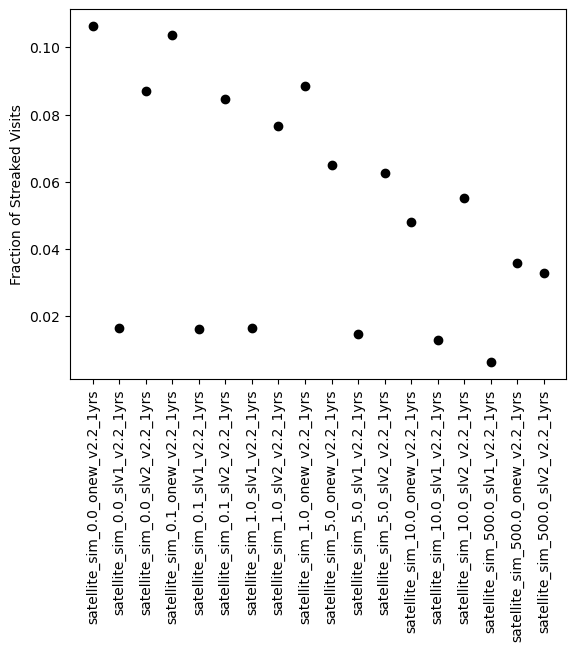

In [14]:

fig, ax = plt.subplots()

ax.plot(df['n_streaked_images']/df['Number of Exposures'], 'ko')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Fraction of Streaked Visits')

Text(0, 0.5, '$\\Delta m$ (mags)')

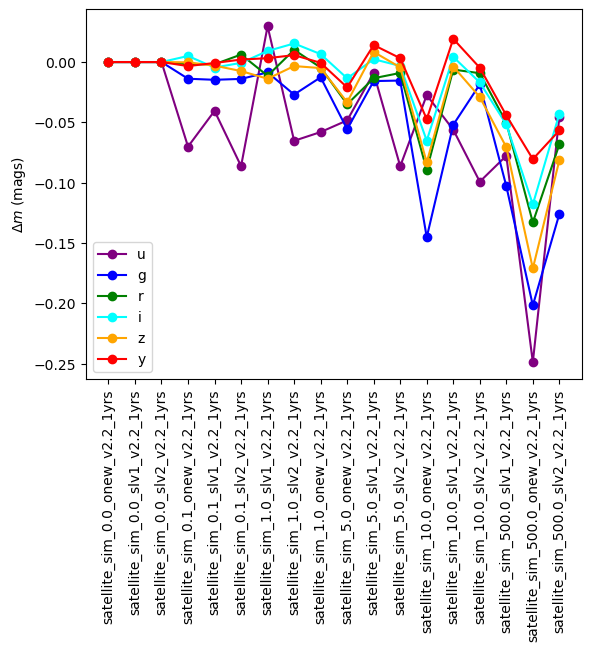

In [15]:
# Should break this into three plots, one for each constellation

fig, ax = plt.subplots()
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}

for filtername in 'ugrizy':
    zp = df['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    ax.plot(df['Median CoaddM5 %s HealpixSlicer' % filtername] - zp, 
            color=f2c[filtername], marker='o', label=filtername )
    
ack = ax.tick_params('x',  rotation=90)
ax.legend()
ax.set_ylabel('$\Delta m$ (mags)')

In [16]:
# The grand plot that we should have! (for each constellation), plot fraction of lost pixels on x-axis
# delta-m on the y-axis, color-coded by filter.

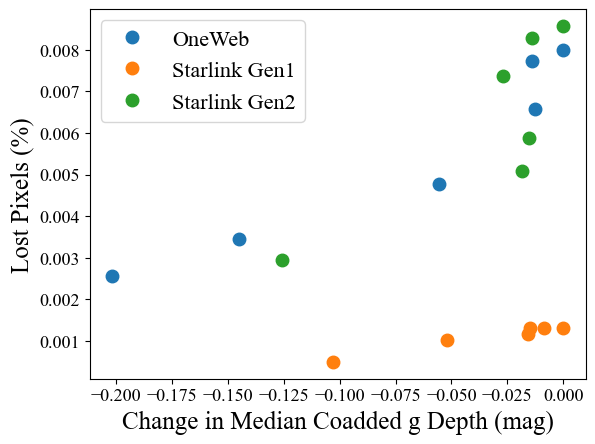

In [11]:
# A lot of info to try and plot here. We have 6 filters, 3 constellations, and 6 weights. 


mask_width = 50 # pix
pixscale = 0.2 #arcsec/pix
n_pix = 2.9e9 #


filtername = 'g'
fig, ax = plt.subplots()
for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)[0]

    zp = df['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    dm = df['Median CoaddM5 %s HealpixSlicer' % filtername] - zp

    mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*60  # in arcmin
    lost_pix_frac = mean_streak_length*60/pixscale*mask_width/n_pix
    if c_name == 'onew': 
        label_name='OneWeb'
    elif c_name == 'slv1':
        label_name='Starlink Gen1'
    else: 
        label_name='Starlink Gen2'
    

    ax.plot(dm.values[good], lost_pix_frac[good]*100, 'o', label=label_name, markersize=9)
ax.set_xlabel('Change in Median Coadded %s Depth (mag)' % filtername,fontsize=18,labelpad=4, **csfont)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(**csfont)
plt.yticks(**csfont)
ax.set_ylabel('Lost Pixels (%)',fontsize=18,labelpad=4, **csfont)
legend = ax.legend(loc='upper left',fontsize=16)
plt.setp(legend.texts, family='Times New Roman')
plt.xticks(**csfont)
plt.yticks(**csfont)


plt.savefig('streak_length_v_deltam.pdf',bbox_inches="tight")

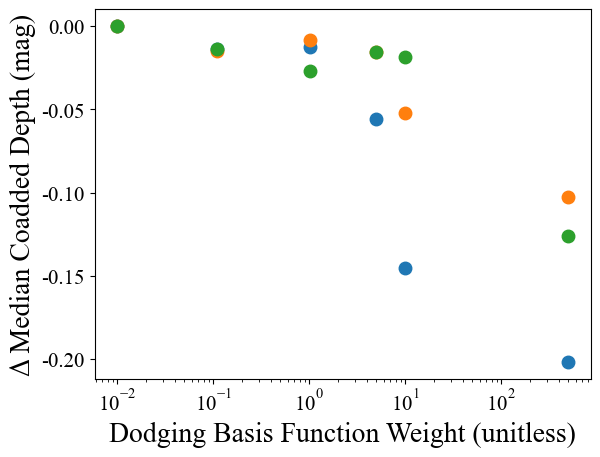

In [78]:

filtername = 'g'
fig, ax = plt.subplots()
for c_name in np.unique(df['constellation_name']):
    good = np.where(df['constellation_name'].values == c_name)[0]

    zp = df['Median CoaddM5 %s HealpixSlicer' % filtername][0]
    dm = df['Median CoaddM5 %s HealpixSlicer' % filtername] - zp

    ax.semilogx(df['dodge_weights'].values[good]+1e-2, dm[good], 'o', label=c_name, markersize=9)
ax.set_ylabel('\u0394 Median Coadded Depth (mag)',fontsize=20,labelpad=4, **csfont)
ax.set_xlabel('Dodging Basis Function Weight (unitless)',fontsize=20,labelpad=4, **csfont)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# legend = ax.legend(loc='upper right',fontsize=16)
# plt.setp(legend.texts, family='Times New Roman')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(**csfont)
plt.yticks(**csfont)

plt.savefig('deltam_v_weight.pdf',bbox_inches="tight")

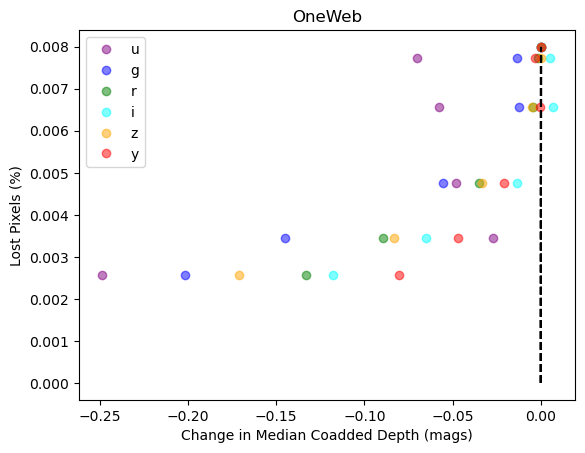

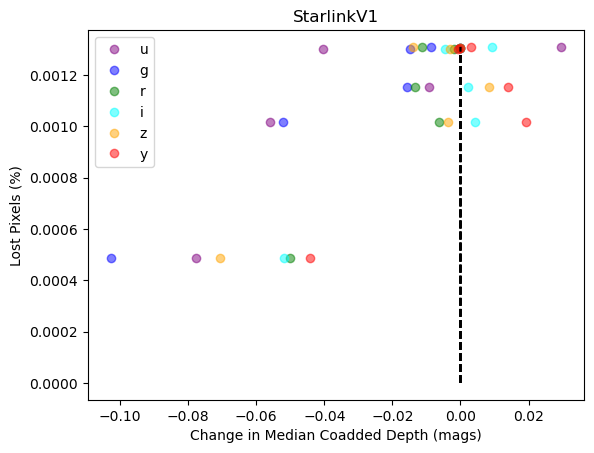

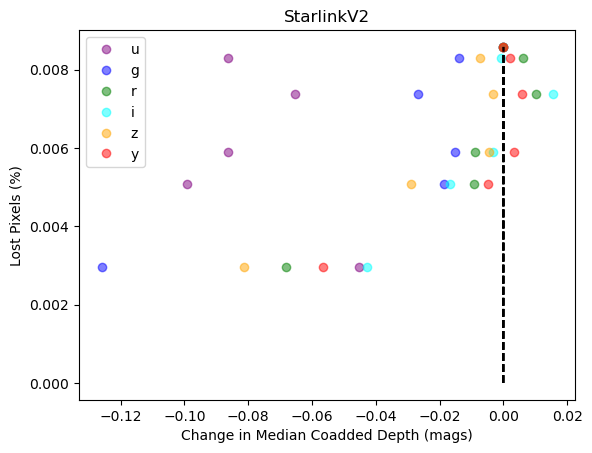

In [19]:

mask_width = 50 # pix
pixscale = 0.2 #arcsec/pix
n_pix = 2.9e9 #

f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}


cname2title = {'onew': 'OneWeb',
              'slv1': 'StarlinkV1',
              'slv2': 'StarlinkV2'}

for c_name in np.unique(df['constellation_name']):
    fig, ax = plt.subplots()
    for filtername in 'ugrizy':
        good = np.where(df['constellation_name'].values == c_name)[0]

        zp = df['Median CoaddM5 %s HealpixSlicer' % filtername][0]
        dm = df['Median CoaddM5 %s HealpixSlicer' % filtername] - zp

        mean_streak_length = df['streak_length_sum']/df['Number of Exposures']*60  # in arcmin
        lost_pix_frac = mean_streak_length*60/pixscale*mask_width/n_pix


        ax.plot(dm.values[good], lost_pix_frac[good]*100, 'o',
                color=f2c[filtername], label=filtername, alpha=0.5 )
        
        
        # Let's add a dashed line showing the "worth it barrier"
        max_frac_lost = np.max(lost_pix_frac[good])
        ax.plot([-max_frac_lost, 0], [0, max_frac_lost*100], '--k')
        
    ax.set_xlabel('Change in Median Coadded Depth (mags)')
    ax.set_ylabel('Lost Pixels (%)')
    ax.set_title(cname2title[c_name])
    ax.legend()
    fig.savefig(c_name+'coadd.pdf')